In [3]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('BankNote_Authentication.csv')

In [6]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

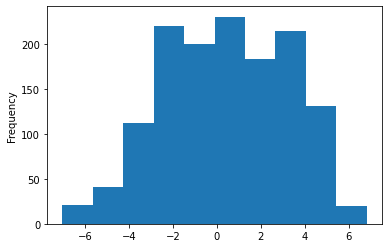

In [11]:
data['variance'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

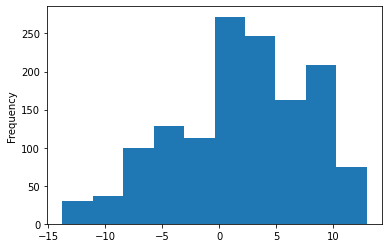

In [12]:
data['skewness'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

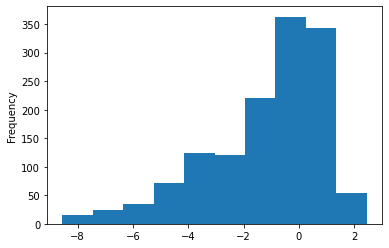

In [14]:
data['entropy'].plot(kind='hist')

In [16]:
X=data.drop(['class'],axis=1)
y=data['class']

In [17]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.7,random_state=1)

In [20]:
#Training model using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()
rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
ytrain_pred = rf_model.predict(X_test)

In [25]:
roc_auc_score(y_test, ytrain_pred)

0.9957446808510638

In [26]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("rf_model.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()